## Phase 3
Deanna Gould

gdm is like gbf but sklearn version


### Overview

### Importing Libraries

In [1]:
# Import libraries for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

# Import libraries for processing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (confusion_matrix, classification_report, ConfusionMatrixDisplay, plot_confusion_matrix)

# Import libraries for modeling
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
## HistGradientBoostingClassifier
from xgboost import XGBClassifier

### Creating Functions

In [127]:
def conf_matrix(estimator, Xtr, ytr):
    cm1 = plot_confusion_matrix(estimator, Xtr, ytr, cmap = 'Blues')
    cm2 = plot_confusion_matrix(estimator, Xtr, ytr, normalize = 'true', cmap = 'Blues')
    return cm1, cm2

In [128]:
def grid_scores(estimator, Xtr, ytr):
    f1_score = estimator.best_score_
    best_params = estimator.best_params_
    best_estimator = estimator.best_estimator_.score(Xtr, ytr)
    print('Average F1 Score: ', f1_score)
    print('Best Parameters: ', best_params)
    print('Best Estimator Score: ', best_estimator)

### Data Analysis

In [2]:
# Creating DataFrame

df = pd.read_csv('Data/churndata.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
# Getting shape of DataFrame

df.shape

(3333, 21)

In [4]:
# Checking what datatypes are in the df

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [5]:
# Running describe and checking if anything stands out

df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [6]:
# Getting count of churn rate

df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [7]:
# Finding churn rate percentages

df['churn'].value_counts(normalize=True)

False    0.855086
True     0.144914
Name: churn, dtype: float64

In [8]:
# Creating a copy of the original df before making any changes

df2 = df.copy()

In [9]:
# Finding a count of null values

df2.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [10]:
# Dropping columns that won't be relevant to the model

df2.drop(columns = ['area code', 'phone number'], axis=1, inplace=True)

In [11]:
# Looking at the df after making changes

df2.head()

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [12]:
# Changing text values to binary values

df2['international plan'], df2['voice mail plan'] = (df2['international plan'].map(dict(yes=1, no=0)), 
                                                     df2['voice mail plan'].map(dict(yes=1, no=0)))

In [13]:
# Checking the df again after making changes

df2.head()

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [14]:
# Changing churn from a boolean datatype to an integer

df2['churn'] = df2['churn'].astype('int64')

In [15]:
# Triple checking the df for changes made

df2.head()

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [16]:
# Getting value counts for churn

df2['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

In [17]:
# Comparing the value counts for international/voice mail plan between the current and original df

print(df['international plan'].value_counts())
print(df['voice mail plan'].value_counts())
print(df2['international plan'].value_counts())
print(df2['voice mail plan'].value_counts())

no     3010
yes     323
Name: international plan, dtype: int64
no     2411
yes     922
Name: voice mail plan, dtype: int64
0    3010
1     323
Name: international plan, dtype: int64
0    2411
1     922
Name: voice mail plan, dtype: int64


In [18]:
# Verifying the datatypes in the df

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   international plan      3333 non-null   int64  
 3   voice mail plan         3333 non-null   int64  
 4   number vmail messages   3333 non-null   int64  
 5   total day minutes       3333 non-null   float64
 6   total day calls         3333 non-null   int64  
 7   total day charge        3333 non-null   float64
 8   total eve minutes       3333 non-null   float64
 9   total eve calls         3333 non-null   int64  
 10  total eve charge        3333 non-null   float64
 11  total night minutes     3333 non-null   float64
 12  total night calls       3333 non-null   int64  
 13  total night charge      3333 non-null   float64
 14  total intl minutes      3333 non-null   

In [19]:
# Looking at the current df

df2

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,WV,68,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,RI,28,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,CT,184,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


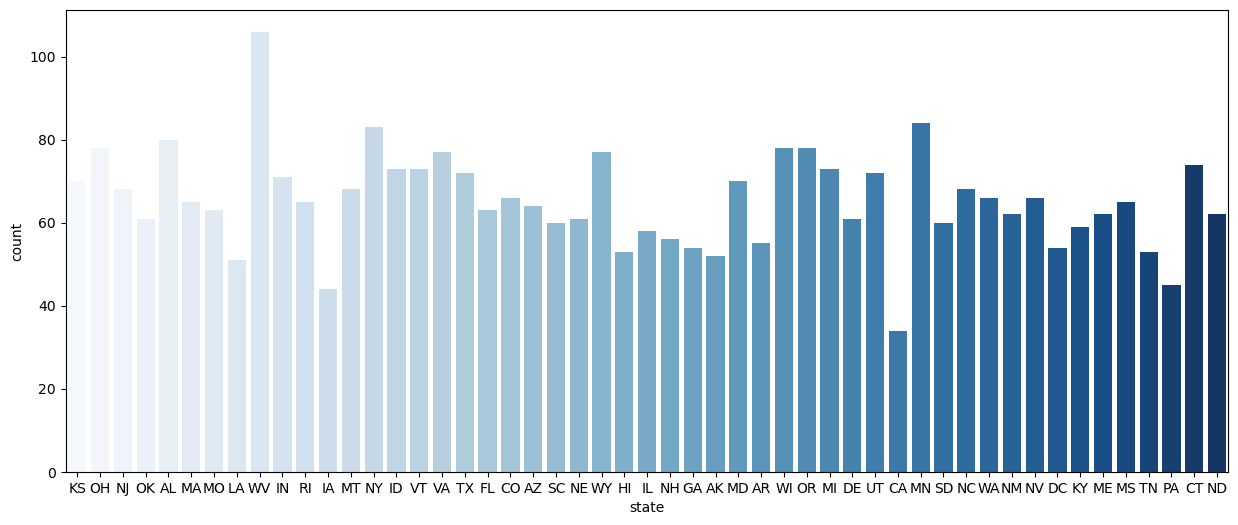

In [20]:
# Plotting the customers by state in a bar plot

fig, axes = plt.subplots(figsize = (15, 6))
sns.countplot(x = 'state', data=df2, palette='Blues');

In [21]:
# Creating another df where churn is true

df3 = df2[df2['churn'] == 1]

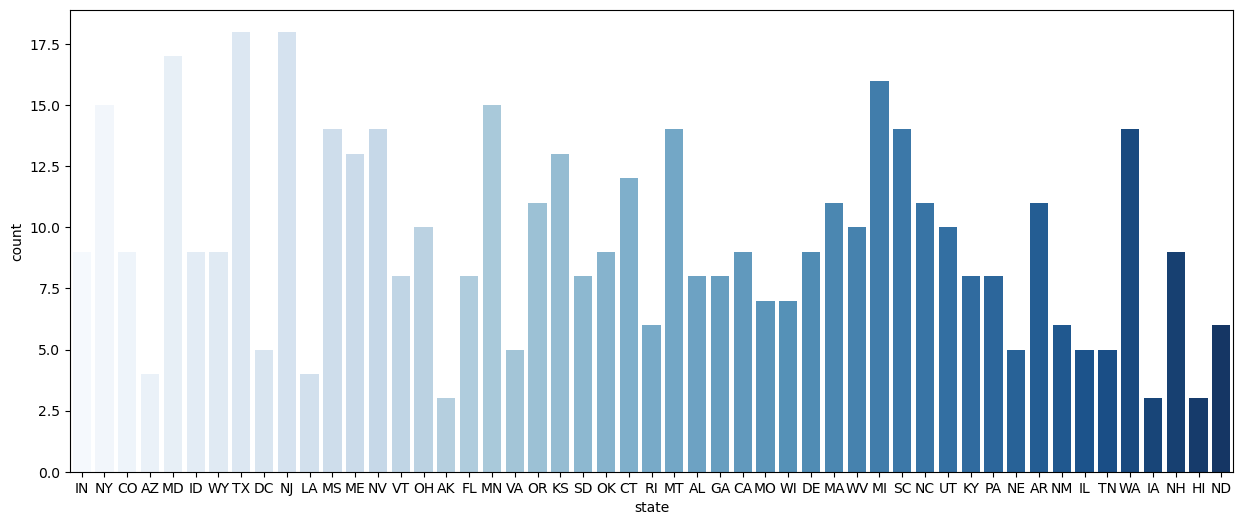

In [22]:
# Checking to see if there is a higher churn based on state

fig, axes = plt.subplots(figsize = (15, 6))
sns.countplot(x = 'state', data = df3, palette = 'Blues');

Based on the par plot above, there are some states with higher churn, but the bar plot is still hard to read, so I'm going to print the states with the highest churn.

In [23]:
# Sorting the new df by states with highest churn

state_churn = df2.groupby('state')['churn'].mean().reset_index()

# Creating a variable for the top 10 states
top_10 = state_churn.sort_values(by = 'churn', ascending = False).head(10)

print(top_10)

   state     churn
31    NJ  0.264706
4     CA  0.264706
43    TX  0.250000
20    MD  0.242857
40    SC  0.233333
22    MI  0.219178
25    MS  0.215385
33    NV  0.212121
47    WA  0.212121
21    ME  0.209677


In [24]:
def churn_rates(df2):
    churn_rate = df2['churn'].value_counts(normalize = True)[1]
    low_churn = df2['churn_rate'].value_counts(normalize = True) > 0 and (df2['churn_rate'].value_counts(
        normalize = True <= 0.04))
    mid_churn = df2['churn_rate'].value_counts(normalize = True) > 0.04 and (df2['churn_rate'].value_counts(
        normalize = True <= 0.10))
    high_churn = df2['churn_rate'].value_counts(normalize = True) > 0.10
    print('Low Churn: ', low_churn)
    print('Mid Churn: ', mid_churn)
    print('High Churn: ', high_churn)

In [25]:
'''
churn_rates(df2)
'''

KeyError: 'churn_rate'

In [ ]:
# find high mid and low churn rates and calculate churn rates
# plot by state
# use if statements to plot them >= <= 
# https://www.statista.com/statistics/219795/blended-customer-churn-rate-of-t-mobile-usa-by-quarter/

Based on the churn rates above, these states have extemely high churn. Considering the function created above based on some brief market research, I will be considering anything 

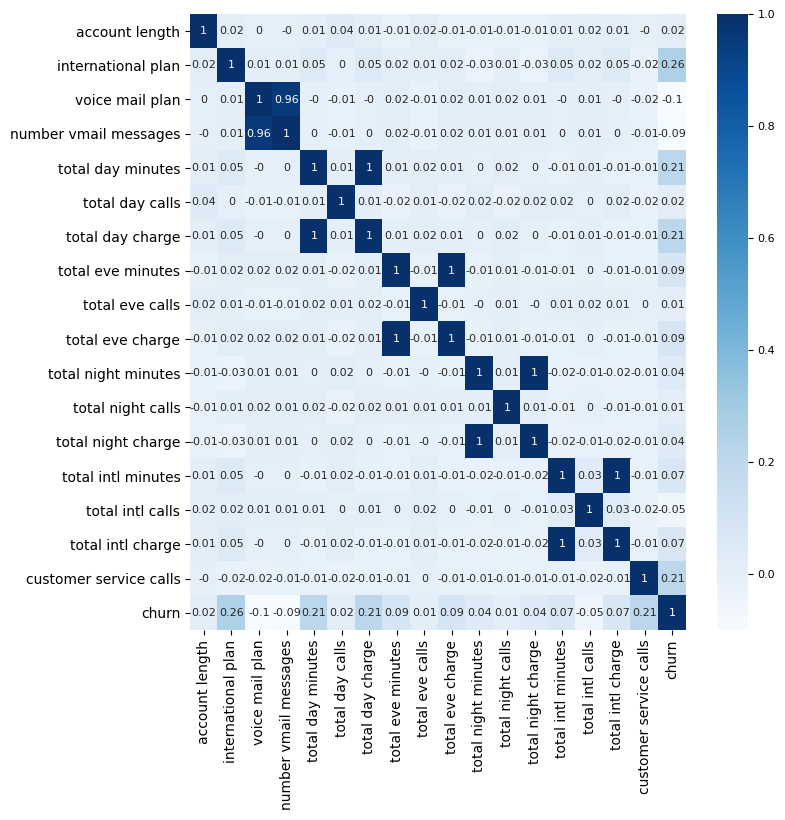

In [26]:
# Creating a heatmap

fig, axes = plt.subplots(figsize = (8, 8))
plt.rcParams.update({'font.size':8})
sns.heatmap(data=df2.corr().round(2), cmap='Blues', annot=True);

Based on the heatmap above, I can see that these are pay as you go phone plans, so charges are assoicated with having an international plan and the minutes used. Along with that, there is a correlation between customer service calls and churn.

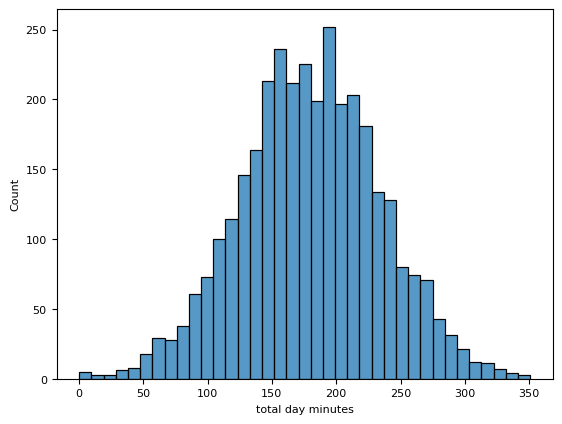

In [27]:
# Creating a histogram to look at the distribution of total day minutes

ax = sns.histplot(x='total day minutes', data=df2, palette='Blues')

<AxesSubplot:xlabel='churn', ylabel='count'>

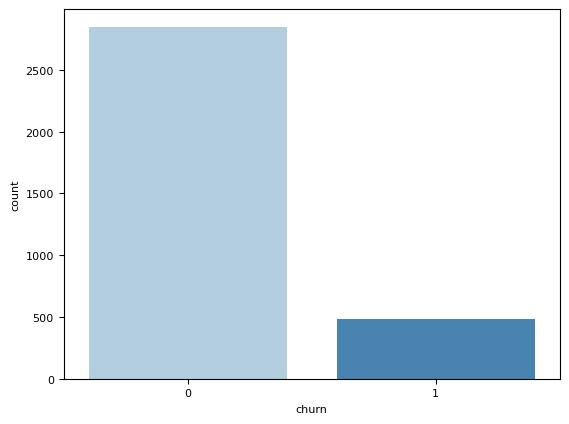

In [28]:
# Visualizing the churn rate in a bar plot

sns.countplot(x='churn', data = df2, palette='Blues')

Because the quantity of plans that churn is drastically different than the quantity of those that don't, I will have to keep classes in mind, and make sure they are a true represenative of the dataset. 

### Preprocessing

In [29]:
# Creating variables for a train test split

X = df2.drop('churn', axis = 1)
y = df2['churn']

# Calling the train test split on my data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [30]:
# Looking at the X_train df

X_train.head()

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
2654,ME,66,0,0,0,207.7,85,35.31,196.7,112,16.72,261.7,83,11.78,6.8,3,1.84,1
3162,UT,81,0,0,0,129.9,121,22.08,230.1,105,19.56,140.5,123,6.32,13.3,3,3.59,0
2333,NM,16,0,0,0,144.8,84,24.62,164.9,141,14.02,231.5,75,10.42,8.2,4,2.21,2
553,UT,61,1,0,0,78.2,103,13.29,195.9,149,16.65,108.0,100,4.86,10.1,6,2.73,2
1921,DE,136,0,0,0,101.7,105,17.29,202.8,99,17.24,136.2,119,6.13,9.4,6,2.54,3


In [31]:
# Separating the numerical and categorical variables in the X_train df

X_train_n = X_train.drop('state', axis = 1)
X_train_c = X_train[['state']]

In [32]:
# Looking at the numerical X_train df

X_train_n.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
2654,66,0,0,0,207.7,85,35.31,196.7,112,16.72,261.7,83,11.78,6.8,3,1.84,1
3162,81,0,0,0,129.9,121,22.08,230.1,105,19.56,140.5,123,6.32,13.3,3,3.59,0
2333,16,0,0,0,144.8,84,24.62,164.9,141,14.02,231.5,75,10.42,8.2,4,2.21,2
553,61,1,0,0,78.2,103,13.29,195.9,149,16.65,108.0,100,4.86,10.1,6,2.73,2
1921,136,0,0,0,101.7,105,17.29,202.8,99,17.24,136.2,119,6.13,9.4,6,2.54,3


In [33]:
# Checking that state is the only variable in the categorical df

X_train_c.head()

,state
2654,ME
3162,UT
2333,NM
553,UT
1921,DE


In [34]:
# Establishing a pipieline use standard scaler and one hot encode the categorical df

n_pipe = Pipeline(steps = [('scaler', StandardScaler())])
c_pipe = Pipeline(steps = [('ohe', OneHotEncoder(sparse = False, handle_unknown = 'ignore'))])

# Calling ColumnTransformer to combine the num and cat df's after the prior steps

cf = ColumnTransformer(transformers = [('state_pipe', c_pipe, X_train_c.columns), ('num', n_pipe, X_train_n.columns)])

## Modeling

### Logistic Regression Baseline

#### Model 1

In [35]:
# Creating a baseline model with logistic regression

lr_base = Pipeline(steps = [('cf', cf), 
                            ('lr', LogisticRegression(class_weight = 'balanced', random_state = 1))])

In [36]:
# Fitting the baseline model by X_train and y_train

lr_base.fit(X_train, y_train)

Pipeline(steps=[('cf',
                 ColumnTransformer(transformers=[('state_pipe',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  Index(['state'], dtype='object')),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['account length', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
 

In [37]:
# Predicting variables for the lr baseline and calling them

lr_base_pred = lr_base.predict(X_train)
lr_base_pred

array([1, 0, 0, ..., 0, 1, 0])

#### Model 1 Check

In [138]:
# Getting the cross validation score and running it 10 times

lr_base_cv = cross_val_score(lr_base, X_train, y_train, cv = 10)
print('CV Scores: ', lr_base_cv, '\n')
print('Average of CV Scores: ', lr_base_cv.mean())

CV Scores:  [0.752      0.76       0.808      0.752      0.756      0.728
 0.728      0.76       0.756      0.83534137] 

Average of CV Scores:  0.7635341365461847


In [42]:
# Now performing classification report

print(classification_report(y_train, lr_base_pred))

              precision    recall  f1-score   support

           0       0.96      0.78      0.86      2138
           1       0.37      0.78      0.50       361

    accuracy                           0.78      2499
   macro avg       0.66      0.78      0.68      2499
weighted avg       0.87      0.78      0.81      2499



Picking the correct measure to determine the effectiveness of a model is dependent on the business problem that needs to be solved. Precision is the percenage of true positives, accounting for false positives. That being said, the amount of false positives would be more important than the amount of false negatives or true negatives. Recall is a percentage of true positives that compares the amount of false negatives. F1 combines precision and recall. Accuracy considers everything, including true negatives, but because of that, the accuracy score can be inflated if there is a proportionally high amount of true negatives in the dataset. I will be using the F1 score to determine the efficacy of the models. 

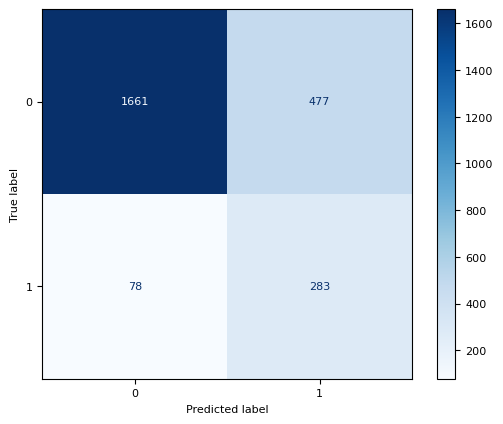

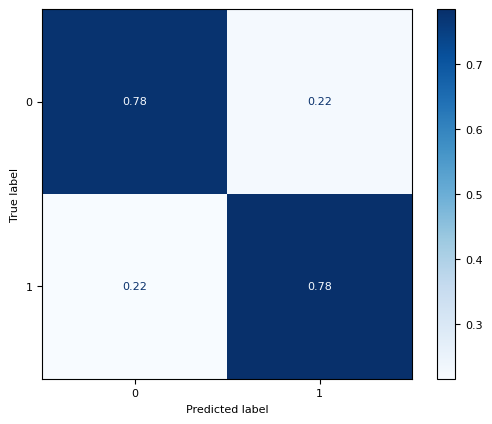

In [129]:
# Plotting the confusion matrix of the train set

conf_matrix(lr_base, X_train, y_train);

In [78]:
# For all 0 classes, 78% were right, and 22% were wrong, for all 1 classes 78% were correct and 22% were wrong

### Logistic Regression GridSearchCV

#### Model 2

Inside a grid search, need to have name of the function (lr) NAMING CONVENTIONS ex: lr __

In [106]:
# Define the grid

lrgrid = [{
    'lr__C': [0.0001, 0.001, 0.01, 0.1, 1.0],
    'lr__penalty': ['l1', 'l2'],
    'lr__solver': ['liblinear']
}]

In [107]:
# Define a grid search

lrgs = GridSearchCV(estimator = lr_base,
                    param_grid = lrgrid, 
                    scoring = 'f1',
                    cv = 10
)

In [108]:
lrgs.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('cf',
                                        ColumnTransformer(transformers=[('state_pipe',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         Index(['state'], dtype='object')),
                                                                        ('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['account length', 'i

In [110]:
lrgs_preds = lrgs.predict(X_train)

#### Model 2 Check

In [111]:
print(classification_report(y_train, lrgs_preds))

              precision    recall  f1-score   support

           0       0.96      0.78      0.86      2138
           1       0.37      0.79      0.51       361

    accuracy                           0.78      2499
   macro avg       0.67      0.78      0.68      2499
weighted avg       0.87      0.78      0.81      2499



In [109]:
grid_scores(lrgs, X_train, y_train)

Average F1 Score:  0.4933176962847427
Best Parameters:  {'lr__C': 0.1, 'lr__penalty': 'l2', 'lr__solver': 'liblinear'}
Best Estimator Score:  0.7795118047218887


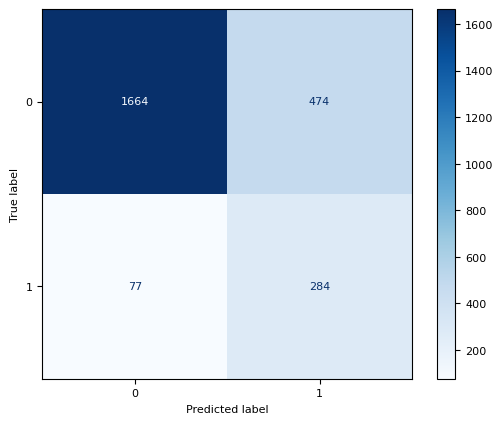

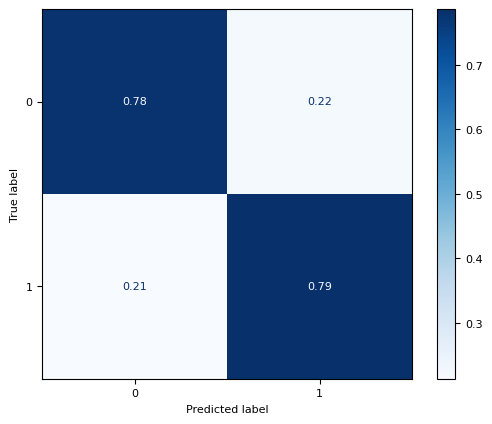

In [115]:
conf_matrix(lrgs, X_train, y_train);

### RandomForest Baseline

#### Model 3

In [61]:
# Creating a baseline for a RandomForest model

rf_base = Pipeline(steps = [('cf', cf), 
                            ('rf', RandomForestClassifier(class_weight = 'balanced', random_state = 1))])

In [62]:
rf_base.fit(X_train, y_train)

Pipeline(steps=[('cf',
                 ColumnTransformer(transformers=[('state_pipe',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  Index(['state'], dtype='object')),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['account length', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
 

In [42]:
# Now performing classification report

print(classification_report(y_train, lr_base_pred))

              precision    recall  f1-score   support

           0       0.96      0.78      0.86      2138
           1       0.37      0.78      0.50       361

    accuracy                           0.78      2499
   macro avg       0.66      0.78      0.68      2499
weighted avg       0.87      0.78      0.81      2499



In [63]:
rfbase_pred = rf_base.predict(X_train)

#### Model 3 Check

In [147]:
# Getting the cross validation score and running it 10 times

rf_base_cv = cross_val_score(rf_base, X_train, y_train, cv = 10)
print('CV Scores: ', rf_base_cv, '\n')
print('Average of CV Scores: ', rf_base_cv.mean())

CV Scores:  [0.924      0.924      0.94       0.92       0.912      0.912
 0.912      0.944      0.948      0.92369478] 

Average of CV Scores:  0.9259694779116467


In [149]:
# Now performing classification report

print(classification_report(y_train, rfbase_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2138
           1       1.00      1.00      1.00       361

    accuracy                           1.00      2499
   macro avg       1.00      1.00      1.00      2499
weighted avg       1.00      1.00      1.00      2499



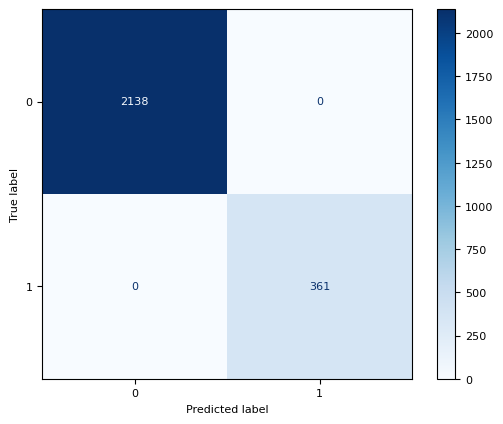

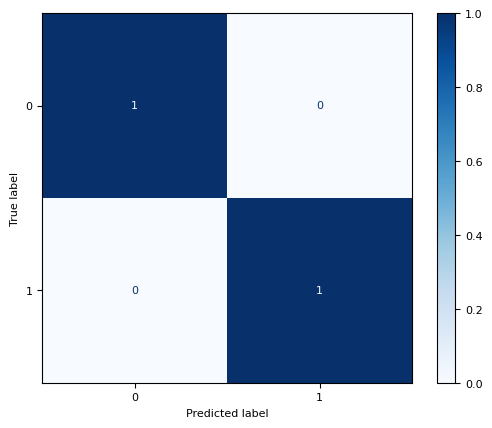

In [116]:
conf_matrix(rf_base, X_train, y_train);

### RandomForest GridSearchCV

#### Model 4

In [64]:
# Defining rf grid

rfgridparams = [{'rf__max_depth': [3, 5, 7],
          'rf__min_samples_split': [2, 5, 10],
          'rf__min_samples_leaf': [3, 5, 7]
}]

In [65]:
# Defining the grid search for rf

rfgridsearch = GridSearchCV(estimator = rf_base, 
                            param_grid = rfgridparams,
                            scoring = 'f1',
                            cv = 5)

In [66]:
rfgridsearch.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cf',
                                        ColumnTransformer(transformers=[('state_pipe',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         Index(['state'], dtype='object')),
                                                                        ('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['account length', 'in

In [140]:
rfgs_pred = rfgridsearch.predict(X_train)

#### Model 4 Check

In [142]:
grid_scores(rfgridsearch, X_train, y_train)

Average F1 Score:  0.7510796712723176
Best Parameters:  {'rf__max_depth': 7, 'rf__min_samples_leaf': 3, 'rf__min_samples_split': 10}
Best Estimator Score:  0.9499799919967987


In [143]:
print(classification_report(y_train, rfgs_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2138
           1       0.80      0.87      0.83       361

    accuracy                           0.95      2499
   macro avg       0.89      0.92      0.90      2499
weighted avg       0.95      0.95      0.95      2499



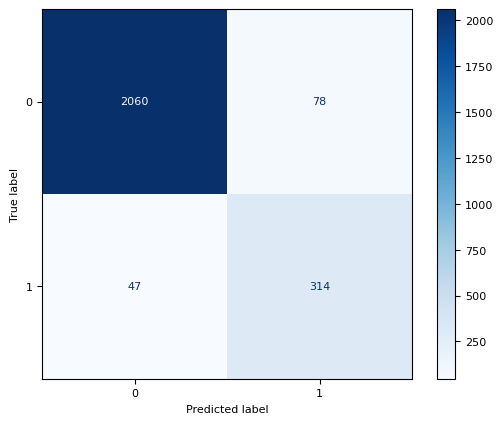

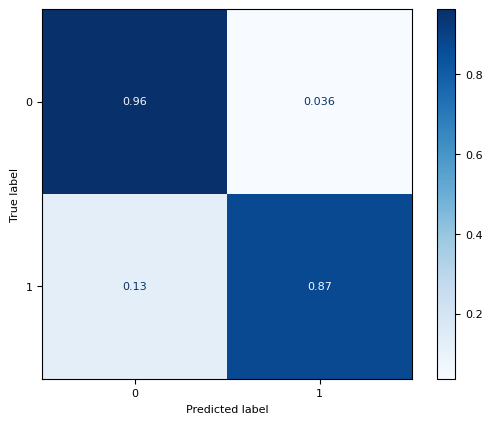

In [144]:
conf_matrix(rfgridsearch, X_train, y_train);

### XGBoost Baseline

#### Model 5

In [121]:
from collections import Counter

# count examples in each class

counter = Counter(y)

# estimate scale_pos_weight value

estimate = counter[0] / counter[1]
print('Estimate: %.3f' % estimate)

Estimate: 5.901


In [123]:
xgb_base = Pipeline(steps = [('cf', cf), 
                            ('xgb', XGBClassifier(scale_pos_weight = estimate, random_state = 1))])

In [145]:
xgb_base.fit(X_train, y_train)

Pipeline(steps=[('cf',
                 ColumnTransformer(transformers=[('state_pipe',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  Index(['state'], dtype='object')),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['account length', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'to...
                               importance_type='gain',
                               interaction_constraints='',
           

In [146]:
xgb_base_preds = xgb_base.predict(X_train)

#### Model 5 Check

In [147]:
# Getting the cross validation score and running it 10 times

xgb_base_cv = cross_val_score(xgb_base, X_train, y_train, cv = 10)
print('CV Scores: ', xgb_base_cv, '\n')
print('Average of CV Scores: ', xgb_base_cv.mean())

CV Scores:  [0.924      0.924      0.94       0.92       0.912      0.912
 0.912      0.944      0.948      0.92369478] 

Average of CV Scores:  0.9259694779116467


In [150]:
# Now performing classification report

print(classification_report(y_train, xgb_base_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2138
           1       1.00      1.00      1.00       361

    accuracy                           1.00      2499
   macro avg       1.00      1.00      1.00      2499
weighted avg       1.00      1.00      1.00      2499



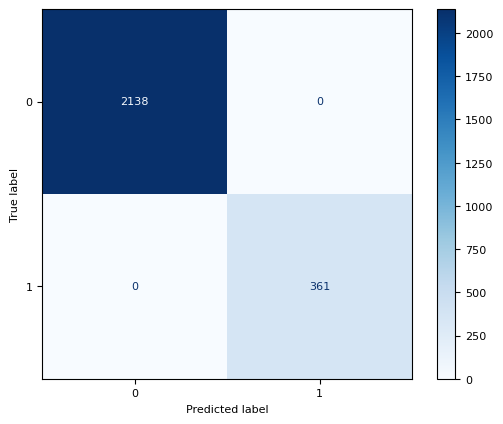

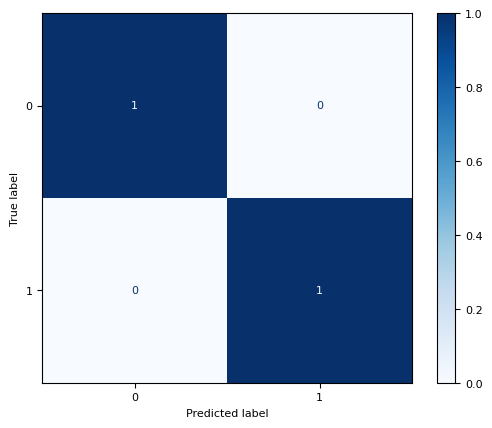

In [151]:
conf_matrix(xgb_base, X_train, y_train);

### XGBoost GridSearchCV

#### Model 6

In [161]:
xgbgridparams = [{
    'xgb__max_depth': [3, 5, 7],
    'xgb__n_estimators': [100, 200, 300],
    'xgb__learning_rate': [0.1, 0.01, 0.001],
    'xgb__subsample': [0.8, 0.9, 1.0],
    'xgb__colsample_bytree': [0.8, 0.9, 1.0]
}]

In [162]:
xgbgridsearch = GridSearchCV(estimator = xgb_base,
                            param_grid = xgbgridparams,
                            scoring = 'f1',
                            cv = 5)

In [164]:
xgbgridsearch.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cf',
                                        ColumnTransformer(transformers=[('state_pipe',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         Index(['state'], dtype='object')),
                                                                        ('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['account length', 'in

In [166]:
xgb_gspreds = xgbgridsearch.predict(X_train)

#### Model 6 Check

In [167]:
grid_scores(xgbgridsearch, X_train, y_train)

Average F1 Score:  0.8337893437709368
Best Parameters:  {'xgb__learning_rate': 0.1, 'xgb__max_depth': 5, 'xgb__n_estimators': 200}
Best Estimator Score:  1.0


In [169]:
print(classification_report(y_train, xgb_gspreds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2138
           1       1.00      1.00      1.00       361

    accuracy                           1.00      2499
   macro avg       1.00      1.00      1.00      2499
weighted avg       1.00      1.00      1.00      2499



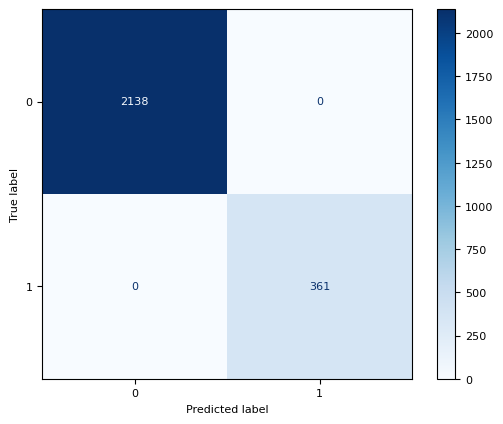

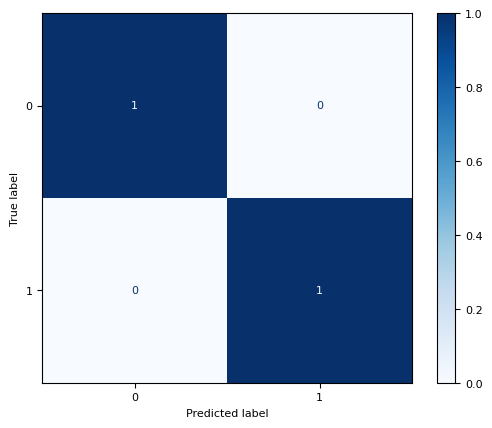

In [170]:
conf_matrix(xgbgridsearch, X_train, y_train);

### Conclusion